In [45]:
from labvision.video import ReadVideo
from labvision.images import basics, threshold
import matplotlib.pyplot as plt
import cv2

import numpy as np

    

In [61]:

def fraction_red(frame):
    blue = threshold(cv2.subtract(frame[:,:,2], frame[:,:,0]),30)
    red = threshold(cv2.subtract(frame[:,:,0], frame[:,:,2]),30)
    total = cv2.add(red,blue)

    fraction = np.sum(np.sum(red)) / np.sum(np.sum(total))
    return fraction


In [62]:
colour = []
vid = ReadVideo('W:/GranularCharge/TwoTone/2023_07_05/P1001789.mp4')
print('Num frames = ', vid.num_frames)
for frame in vid:
    colour.append(fraction_red(frame))
    

Num frames =  19230


Exception: Cannot read frame

In [91]:
def get_fft(data, fps=60):
    ps = np.abs(np.fft.fft(data))**2
    time_step = 1 / fps
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)

    #Smooth data
    print(np.shape(freqs))
    freq_new=np.mean(np.reshape(freqs[idx][int((len(idx)/2)+1):],(int(len(freqs)/10),-1)),axis=1)
    ps_new=np.mean(np.reshape(ps[idx][int((len(idx)/2)+1):],(int(len(ps)/10),-1)),axis=1)
    print(np.shape(freq_new))
    return freqs[idx][int((len(idx)/2)+1):], ps[idx][int((len(idx)/2)+1):]


(2001,)
(200,)
(2001,)
(200,)
(2001,)
(200,)


(0.0, 6.0)

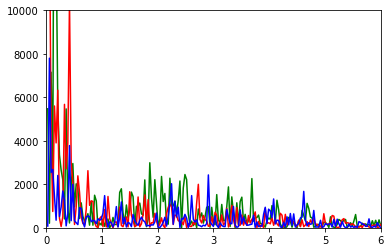

In [92]:
colours = np.array(colour)
#np.savetxt('P1001789.txt', colours)

f1, ps1 = get_fft(colours[:2001])
f2, ps2 = get_fft(colours[8000:10001])
f3, ps3 = get_fft(colours[15000:17001])





plt.plot(f1, ps1,'g-')
plt.plot(f2, ps2,'r-')
plt.plot(f3, ps3,'b-')
plt.ylim([0,10000])
plt.xlim([0,6])